
**<br>Understanding Benfords law on a COVID dataset**
**<br>Author: Jatan Pandya**
**<br>Date: 1/11/2020** 


In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chisquare


**Read the CSV file**

In [19]:
covid19_df = pd.read_csv('covid19_db/us_states_covid19_daily.csv')
covid19_df
df = covid19_df.copy()
df['Value'] = df['positive']
df


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,Value
0,20200810,AK,4539.0,275804.0,NaN,37.0,NaN,NaN,NaN,3.0,...,0,0,b509299c436632a9bb6c07a37fe0a942ba42d736,0,0,0,0,0,NaN,4539.0
1,20200810,AL,103020.0,677547.0,NaN,1528.0,12070.0,NaN,1249.0,NaN,...,29,533,bc7c88c5e4e61a5aacd73bceef95889e5b77bbd3,0,0,0,0,0,NaN,103020.0
2,20200810,AR,50028.0,519292.0,NaN,508.0,3336.0,NaN,NaN,117.0,...,11,52,3003372b79996f2d842ac417e2dceaab2971a7b3,0,0,0,0,0,NaN,50028.0
3,20200810,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,ccffb3614fb87b4cafee3b19c44d3eb7d10d5913,0,0,0,0,0,NaN,0.0
4,20200810,AZ,187523.0,840708.0,NaN,1575.0,19277.0,506.0,NaN,366.0,...,4,9,56226bd3514052487433ab4eeb94e8ef3f6e058f,0,0,0,0,0,NaN,187523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,20200126,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,NaN,2.0
8861,20200125,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,NaN,2.0
8862,20200124,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,NaN,2.0
8863,20200123,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,NaN,2.0


**Ignore NaN values by replacing them with zero. Zero is ignored while calculating the observed frequencies. Only 1-9 are considered**

In [20]:

df['Value'] = df['Value'].fillna(0)

df['Value'].isnull().any()


False

**Find the first non-zero digit in the value column and store it back to the Value column**
**TODO: Can we vectorize this operation? Don't use for loop**

In [21]:
def less_than_1(num):
    i=1
    while int(num*(10**i)) == 0:
        i=i+1       
    return int(num*(10**i))
    
def greater_than_equal_to_10(num):
    i = 1
    while (num//(10**i)) >= 10:
        i = i+1
        
    return (num//(10**i))
            

##Write a function that returns the first digit
def return_first_digit(x):
    ##Number is zero - ignore
    if x == 0:
        return x
    ##Number is less than 1. Find the first non-zero digit
    elif int(x) == 0:
        return less_than_1(x)
    ##Number is greater than 1 and less than 10. Use it directly
    elif int(x < 10):
        return int(x)
    ##Number is greater than or equal to 10. Find the first digit
    else:
        return greater_than_equal_to_10(x)        
         
for i in df.index:
    df.loc[i,'Value'] = return_first_digit(df.loc[i]['Value'])
        
df.head()
       


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,Value
0,20200810,AK,4539.0,275804.0,NaN,37.0,NaN,NaN,NaN,3.0,...,0,0,b509299c436632a9bb6c07a37fe0a942ba42d736,0,0,0,0,0,NaN,4.0
1,20200810,AL,103020.0,677547.0,NaN,1528.0,12070.0,NaN,1249.0,NaN,...,29,533,bc7c88c5e4e61a5aacd73bceef95889e5b77bbd3,0,0,0,0,0,NaN,1.0
2,20200810,AR,50028.0,519292.0,NaN,508.0,3336.0,NaN,NaN,117.0,...,11,52,3003372b79996f2d842ac417e2dceaab2971a7b3,0,0,0,0,0,NaN,5.0
3,20200810,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,ccffb3614fb87b4cafee3b19c44d3eb7d10d5913,0,0,0,0,0,NaN,0.0
4,20200810,AZ,187523.0,840708.0,NaN,1575.0,19277.0,506.0,NaN,366.0,...,4,9,56226bd3514052487433ab4eeb94e8ef3f6e058f,0,0,0,0,0,NaN,1.0


**Add the count column, which indicates the observed frequencies**

In [22]:
df.insert(2, 'Count',df['Value'])

**Count column calculates the frequencies of the digits**

In [23]:
hist = df[['Value','Count']].groupby('Value').count()
hist

,Count
Value,
0.0,265
1.0,2553
2.0,1347
3.0,1184
4.0,909
5.0,676
6.0,658
7.0,459
8.0,402


**Drop the zero**

In [24]:


if(hist.index[0] == 0.0):
    hist_zero_dropped = hist.drop(hist.index[0])
else:
    hist_zero_dropped = hist
    
print(hist_zero_dropped)



       Count
Value       
1.0     2553
2.0     1347
3.0     1184
4.0      909
5.0      676
6.0      658
7.0      459
8.0      402
9.0      412


**Count in percentages**

In [25]:
total_count = hist_zero_dropped.sum()
normalized_final_hist = (hist_zero_dropped['Count']/total_count['Count'])*100
print(type(normalized_final_hist))
normalized_final_hist

<class 'pandas.core.series.Series'>


Value
1.0    29.686047
2.0    15.662791
3.0    13.767442
4.0    10.569767
5.0     7.860465
6.0     7.651163
7.0     5.337209
8.0     4.674419
9.0     4.790698
Name: Count, dtype: float64

**New dataframe with both actual and expected frequency distributions**

In [26]:
d = {'actual' : normalized_final_hist,
    'expected' : pd.Series([30.1, 17.6, 12.5,9.7,7.9,6.7,5.8,5.1,4.6], index=[1.0, 2.0, 3.0,4.0,5.0,6.0,7.0,8.0,9.0])}
df = pd.DataFrame(d)
df


,actual,expected
1.0,29.686047,30.1
2.0,15.662791,17.6
3.0,13.767442,12.5
4.0,10.569767,9.7
5.0,7.860465,7.9
6.0,7.651163,6.7
7.0,5.337209,5.8
8.0,4.674419,5.1
9.0,4.790698,4.6


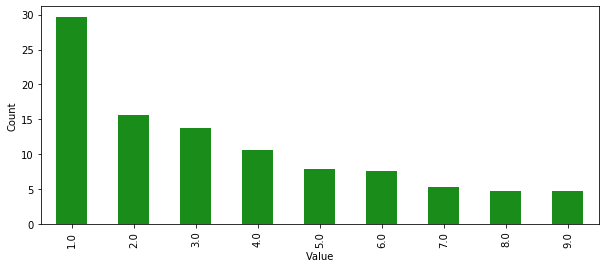

In [27]:
fig, ax = plt.subplots(figsize=(10,4))
plt.xlabel('First Digit')
plt.ylabel('Count')
normalized_final_hist.plot(kind = 'bar', ax=ax, alpha = 0.9,color='g' )

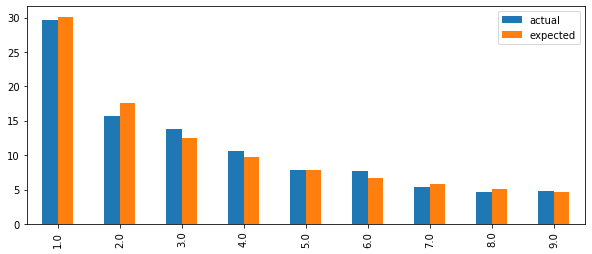

In [28]:
df.plot(kind = 'bar',figsize=(10,4))

**Chi-Square hypothesis testing**

In [29]:
chisquare(df['actual'], df['expected'])


Power_divergenceResult(statistic=0.6409962476181587, pvalue=0.9996593220222274)